<a href="https://colab.research.google.com/github/DaviAlbini/data-science-projects/blob/main/03-avancados/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Analysis**

1.   Conhecendo códigos no Python
2.   Comunidades Karate
3.   Comunidades Karate 2



### **Conhecendo códigos no Python**

In [3]:
# Instalar os pacotes necessários

!pip install igraph
!pip install pycairo
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 41.5 MB/s eta 0:00:00


In [4]:
# Importar pacotes
from igraph import Graph, plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Praticando com nosso exemplo feito à mão:

g = Graph()
g.add_vertices(5)
g.vs["name"] = ["A", "B", "C", "D", "E"]
g.add_edges([("A","B"), ("B","C"), ("B","D"), ("D","C"), ("C","E")])
print(g)

IGRAPH UN-- 5 5 --
+ attr: name (v)
+ edges (vertex names):
A--B, B--C, B--D, C--D, C--E


In [6]:
# Inserindo pesos no meu grafo (neste caso, todas 1)
g.es['weight']=[1,1,1,1,1]

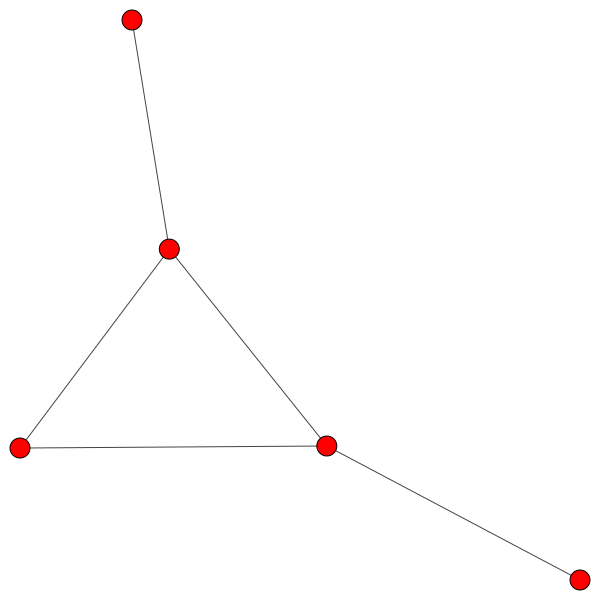

In [7]:
# Plotando o grafo:
plot(g)

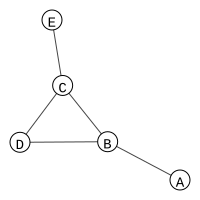

In [8]:
# Sofisticando o grafo utilizando funções para melhorar a visualização:

layout = g.layout("kk")
# existem varios layouts https://igraph.org/python/doc/tutorial/visualisation.html#graph-layouts
visual_style = {}
visual_style["vertex_color"] = "white"
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = ["A", "B", "C", "D", "E"]
visual_style["edge_width"] = g.es['weight']
visual_style["bbox"] = (200, 200)
plot(g, **visual_style)

In [9]:
# Extraindo metricas da rede (geral):

# diametro da rede
g.diameter()

# raio da rede
g.radius()

# comprimeiro medio do caminho
g.average_path_length()

1.6

In [10]:
# Extraindo metricas dos nós (vertices):

# degree
g.degree()


# clustering coeficient
g.transitivity_local_undirected()


# closeness
g.closeness(weights=None, normalized=True)


# closeness
g.closeness(weights=None, normalized=False)
#quando normalized=False o valor anterior é dividido pelo número de caminhos curtos


# betweeness
g.betweenness(weights=None)


# excentricidade
g.eccentricity()


# o famoso e tao desejado bridge (ponte ou ponto de articulacao)
g.articulation_points()
#retorna a lista de [0 até 6] com a posição da letra (nesse caso B, C)

[1, 2]

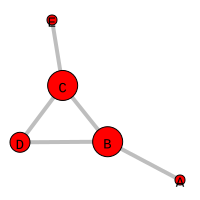

In [15]:
# Sofisticando o grafo utilizando as medidas para melhorar a visualização:

# para plotar aumentando o tamanho dos nos a partir do degree, por exemplo:
deg = g.degree()
deg = [i * 10 for i in deg]
deg
plot(g, vertex_size=deg,  vertex_color=['red'], vertex_label=["A", "B", "C", "D", "E"],  edge_width=[ 4], edge_color=['grey'], bbox = (200, 200))


In [16]:
# Como podemos ver as tabelas com essas medidas?
# Você tem que armazenar as medidas como atributos armazenando todas as medidas e transformando em data frame desta forma:

names = ["A", "B", "C", "D", "E"]
degree = g.degree()
cc = g.transitivity_local_undirected()
closeness = g.closeness(weights=None, normalized=True)
betweenneess = g.betweenness(weights=None)
excentricidade = g.eccentricity()

a = pd.DataFrame(np.column_stack([names, degree, cc, closeness, betweenneess, excentricidade]), columns=['names','degree', 'cc', 'closeness', 'betweenneess', 'excentricidade'])
a

,names,degree,cc,closeness,betweenneess,excentricidade
0,A,1,nan,0.5,0.0,3.0
1,B,3,0.3333333333333333,0.8,3.0,2.0
2,C,3,0.3333333333333333,0.8,3.0,2.0
3,D,2,1.0,0.6666666666666666,0.0,2.0
4,E,1,nan,0.5,0.0,3.0


In [17]:
# outra forma >>>> Função para criar dataframe com as medidas da rede
def stats_rede( rede, nodes:list ):
    df = pd.DataFrame( {"nodes": nodes} )
    df["degree"] = rede.degree()
    df["cc"] = rede.transitivity_local_undirected()
    df["closeness"] = rede.closeness(weights=None, normalized=False)
    df["betweenness"] = rede.betweenness()
    df["bridge"] = df["nodes"].isin(rede.articulation_points()).astype(int)
    return df


# chamando a função criada
df_stat_geral = stats_rede( g, list(range(g.vcount())) )
df_stat_geral

,nodes,degree,cc,closeness,betweenness,bridge
0,0,1,NaN,0.125000,0.0,0
1,1,3,0.333333,0.200000,3.0,1
2,2,3,0.333333,0.200000,3.0,1
3,3,2,1.000000,0.166667,0.0,0
4,4,1,NaN,0.125000,0.0,0


### **Comunidades Karate**

In [18]:
# Vamos trabalhar com a base de dados Karate:
karate = pd.read_csv("/content/karate.csv",sep=";")
karate

,Source,Target,Type
0,0,9,Undirected
1,0,10,Undirected
2,0,14,Undirected
3,0,15,Undirected
4,0,16,Undirected
...,...,...,...
73,33,23,Undirected
74,33,24,Undirected
75,33,30,Undirected
76,33,31,Undirected


In [19]:
# Transformando a base em Grafo
rede_karate = Graph.DataFrame(karate, directed=False)

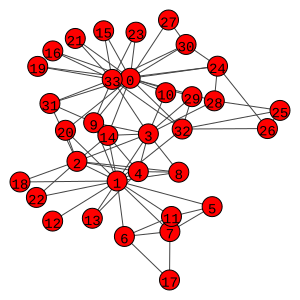

In [20]:
# plotando o grafo
plot(rede_karate, bbox = (300, 300), vertex_label=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33"])


In [23]:
# Avaliando a modularidade de cada método e a quantidade de comunidades geradas:

# Lista de métodos de detecção de comunidade
metodos = {
    "Edge Betweenness": rede_karate.community_edge_betweenness().as_clustering(),
    "Fast Greedy": rede_karate.community_fastgreedy().as_clustering(),
    "Walktrap": rede_karate.community_walktrap().as_clustering(),
    "Louvain": rede_karate.community_multilevel(),
    "Label Propagation": rede_karate.community_label_propagation(),
    "Spin Glass": rede_karate.community_spinglass()
}

# Inicializando a tabela com resultados
resultados = []

# Loop através dos métodos e calcular modularidade, número de comunidades e estatísticas dos tamanhos dos grupos
for metodo_nome, metodo in metodos.items():
    modularidade = metodo.modularity
    num_comunidades = len(metodo)

    # Obter o tamanho das comunidades (número de nós em cada comunidade)
    tamanhos_comunidades = [len(comunidade) for comunidade in metodo]

    # Calcular as estatísticas: mínimo, máximo, média e desvio padrão do tamanho das comunidades
    min_tam = np.min(tamanhos_comunidades)
    max_tam = np.max(tamanhos_comunidades)
    media_tam = np.mean(tamanhos_comunidades)
    dp_tam = np.std(tamanhos_comunidades)

    # Adicionar resultados na lista
    resultados.append([
        metodo_nome,
        modularidade,
        num_comunidades,
        min_tam,
        max_tam,
        media_tam,
        dp_tam
    ])

# Criar um DataFrame para exibir os resultados
df_resultados = pd.DataFrame(resultados, columns=[
    "Método",
    "Modularidade",
    "Número de Comunidades",
    "Min Tamanho",
    "Max Tamanho",
    "Média Tamanho",
    "Desvio Padrão Tamanho"
])

# Mostrar a tabela de resultados
df_resultados


,Método,Modularidade,Número de Comunidades,Min Tamanho,Max Tamanho,Média Tamanho,Desvio Padrão Tamanho
0,Edge Betweenness,0.401298,5,1,12,6.800000,3.867816
1,Fast Greedy,0.380671,3,8,17,11.333333,4.027682
2,Walktrap,0.353222,5,4,9,6.800000,2.039608
3,Louvain,0.415105,4,4,14,8.500000,4.153312
4,Label Propagation,0.371795,2,17,17,17.000000,0.000000
5,Spin Glass,0.419790,4,5,12,8.500000,3.041381


In [24]:
# Função para criar dataframe com as medidas da rede
def stats_rede( rede, nodes:list ):
    df = pd.DataFrame( {"nodes": nodes} )
    df["degree"] = rede.degree()
    df["cc"] = rede.transitivity_local_undirected()
    df["closeness"] = rede.closeness(weights=None, normalized=True)
    df["betweenness"] = rede.betweenness()
    df["bridge"] = df["nodes"].isin(rede.articulation_points()).astype(int)
    return df

In [25]:
# Analisando as medidas para a rede completa através da função criada
df_stat_geral = stats_rede( rede_karate, list(range(rede_karate.vcount())) )
df_stat_geral.head()

,nodes,degree,cc,closeness,betweenness,bridge
0,0,17,0.110294,0.550000,160.551587,0
1,1,16,0.150000,0.568966,231.071429,1
2,2,9,0.333333,0.485294,28.478571,0
3,3,10,0.244444,0.559322,75.850794,0
4,4,6,0.666667,0.464789,6.288095,0


In [26]:
# Função para criar dataframe com as medidas por comunidade
def stats_comunidade( comunidade, nodes:list ):
    df = pd.DataFrame( {"nodes": nodes} )
    df["degree"] = comunidade.degree()
    df["cc"] = comunidade.transitivity_local_undirected()
    df["closeness"] = comunidade.closeness()
    df["betweenness"] = comunidade.betweenness()
    df["bridge"] = df["nodes"].isin(comunidade.articulation_points()).astype(int)
    return df

In [27]:
# executando a comunidade pelo método escolhido
comunidades = rede_karate.community_multilevel()

In [28]:
# criando data frame que marca a qual comunidade cada nó pertence
df_rede_pandas_karate = pd.DataFrame( {"nodes": list(range(len(comunidades.membership))), "membership": comunidades.membership} )

df_rede_pandas_karate.head()

,nodes,membership
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [29]:
# pega as comunidades distintas
comunidades_dst = df_rede_pandas_karate["membership"].unique()

# percorre todas comunidades para realizar a estrutura do dataframe
dfs_stats = []
for c in comunidades_dst:
    nodes = df_rede_pandas_karate[ df_rede_pandas_karate["membership"]==c ]["nodes"].tolist()
    dfs_stats.append( stats_comunidade( comunidades.subgraphs()[c], nodes) )

df_stat_comu = pd.concat(dfs_stats) # junta a parada toda

# Organiza o df para ficar bonitinho
df_stat_comu = df_stat_comu.merge( df_rede_pandas_karate, on="nodes", how="left" ).sort_values(by="nodes")

df_stat_comu.head()

,nodes,degree,cc,closeness,betweenness,bridge,membership
0,0,12,0.196970,1.000000,34.00,0,0
13,1,10,0.288889,0.916667,24.75,0,1
14,2,8,0.428571,0.785714,9.25,1,1
15,3,6,0.600000,0.687500,10.25,0,1
16,4,6,0.666667,0.687500,2.75,0,1


In [30]:
# Criando data frame com todas as medidas da rede e por comunidade:
df_stat = df_stat_comu.merge( df_stat_geral, on=["nodes"], how="inner", suffixes=["_comunidade", "_geral"] )
df_stat.head()

,nodes,degree_comunidade,cc_comunidade,closeness_comunidade,betweenness_comunidade,bridge_comunidade,membership,degree_geral,cc_geral,closeness_geral,betweenness_geral,bridge_geral
0,0,12,0.196970,1.000000,34.00,0,0,17,0.110294,0.550000,160.551587,0
1,1,10,0.288889,0.916667,24.75,0,1,16,0.150000,0.568966,231.071429,1
2,2,8,0.428571,0.785714,9.25,1,1,9,0.333333,0.485294,28.478571,0
3,3,6,0.600000,0.687500,10.25,0,1,10,0.244444,0.559322,75.850794,0
4,4,6,0.666667,0.687500,2.75,0,1,6,0.666667,0.464789,6.288095,0


### **Comunidades Karate 2**

In [32]:
karate = pd.read_csv("/content/karate.csv",sep=";")
karate

,Source,Target,Type
0,0,9,Undirected
1,0,10,Undirected
2,0,14,Undirected
3,0,15,Undirected
4,0,16,Undirected
...,...,...,...
73,33,23,Undirected
74,33,24,Undirected
75,33,30,Undirected
76,33,31,Undirected


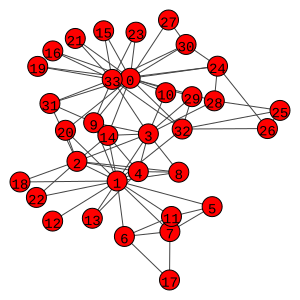

In [34]:
rede_karate = Graph.DataFrame(karate, directed=False)
plot(rede_karate, bbox = (300, 300), vertex_label=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33"])


In [35]:
# Avaliando a modularidade de cada método e a quantidade de comunidades geradas:

# Lista de métodos de detecção de comunidade
metodos = {
    "Edge Betweenness": rede_karate.community_edge_betweenness().as_clustering(),
    "Fast Greedy": rede_karate.community_fastgreedy().as_clustering(),
    "Walktrap": rede_karate.community_walktrap().as_clustering(),
    "Louvain": rede_karate.community_multilevel(),
    "Label Propagation": rede_karate.community_label_propagation(),
    "Spin Glass": rede_karate.community_spinglass()
}

# Inicializando a tabela com resultados
resultados = []

# Loop através dos métodos e calcular modularidade, número de comunidades e estatísticas dos tamanhos dos grupos
for metodo_nome, metodo in metodos.items():
    modularidade = metodo.modularity
    num_comunidades = len(metodo)

    # Obter o tamanho das comunidades (número de nós em cada comunidade)
    tamanhos_comunidades = [len(comunidade) for comunidade in metodo]

    # Calcular as estatísticas: mínimo, máximo, média e desvio padrão do tamanho das comunidades
    min_tam = np.min(tamanhos_comunidades)
    max_tam = np.max(tamanhos_comunidades)
    media_tam = np.mean(tamanhos_comunidades)
    dp_tam = np.std(tamanhos_comunidades)

    # Adicionar resultados na lista
    resultados.append([
        metodo_nome,
        modularidade,
        num_comunidades,
        min_tam,
        max_tam,
        media_tam,
        dp_tam
    ])

# Criar um DataFrame para exibir os resultados
df_resultados = pd.DataFrame(resultados, columns=[
    "Método",
    "Modularidade",
    "Número de Comunidades",
    "Min Tamanho",
    "Max Tamanho",
    "Média Tamanho",
    "Desvio Padrão Tamanho"
])

# Mostrar a tabela de resultados
df_resultados

,Método,Modularidade,Número de Comunidades,Min Tamanho,Max Tamanho,Média Tamanho,Desvio Padrão Tamanho
0,Edge Betweenness,0.401298,5,1,12,6.800000,3.867816
1,Fast Greedy,0.380671,3,8,17,11.333333,4.027682
2,Walktrap,0.353222,5,4,9,6.800000,2.039608
3,Louvain,0.418803,4,5,12,8.500000,3.041381
4,Label Propagation,0.374425,3,3,18,11.333333,6.236096
5,Spin Glass,0.419790,4,5,12,8.500000,3.041381


In [36]:
# Função para criar dataframe com as medidas da rede
def stats_rede( rede, nodes:list ):
    df = pd.DataFrame( {"nodes": nodes} )
    df["degree"] = rede.degree()
    df["cc"] = rede.transitivity_local_undirected()
    df["closeness"] = rede.closeness(weights=None, normalized=True)
    df["betweenness"] = rede.betweenness()
    df["bridge"] = df["nodes"].isin(rede.articulation_points()).astype(int)
    return df

In [37]:
df_stat_geral = stats_rede( rede_karate, list(range(rede_karate.vcount())) )
df_stat_geral.head()

,nodes,degree,cc,closeness,betweenness,bridge
0,0,17,0.110294,0.550000,160.551587,0
1,1,16,0.150000,0.568966,231.071429,1
2,2,9,0.333333,0.485294,28.478571,0
3,3,10,0.244444,0.559322,75.850794,0
4,4,6,0.666667,0.464789,6.288095,0


In [38]:
# Função para criar dataframe com as medidas por comunidade
def stats_comunidade( comunidade, nodes:list ):
    df = pd.DataFrame( {"nodes": nodes} )
    df["degree"] = comunidade.degree()
    df["cc"] = comunidade.transitivity_local_undirected()
    df["closeness"] = comunidade.closeness()
    df["betweenness"] = comunidade.betweenness()
    df["bridge"] = df["nodes"].isin(comunidade.articulation_points()).astype(int)
    return df

In [39]:
comunidades = rede_karate.community_multilevel()

In [40]:
# criando data frame que marca a qual comunidade cada nó pertence
df_rede_pandas_karate = pd.DataFrame( {"nodes": list(range(len(comunidades.membership))), "membership": comunidades.membership} )

df_rede_pandas_karate.head()


,nodes,membership
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [41]:
# pega as comunidades distintas
comunidades_dst = df_rede_pandas_karate["membership"].unique()

# percorre todas comunidades para realizar a estrutura do dataframe
dfs_stats = []
for c in comunidades_dst:
    nodes = df_rede_pandas_karate[ df_rede_pandas_karate["membership"]==c ]["nodes"].tolist()
    dfs_stats.append( stats_comunidade( comunidades.subgraphs()[c], nodes) )

df_stat_comu = pd.concat(dfs_stats) # junta a parada toda

# Organiza o df para ficar bonitinho
df_stat_comu = df_stat_comu.merge( df_rede_pandas_karate, on="nodes", how="left" ).sort_values(by="nodes")

df_stat_comu.head()

,nodes,degree,cc,closeness,betweenness,bridge,membership
0,0,13,0.166667,1.000000,46.00,1,0
14,1,10,0.288889,1.000000,21.75,0,1
15,2,8,0.428571,0.833333,7.75,0,1
16,3,5,0.900000,0.666667,0.25,0,1
17,4,6,0.666667,0.714286,2.25,0,1


In [42]:
# Criando data frame com todas as medidas da rede e por comunidade:
df_stat = df_stat_comu.merge( df_stat_geral, on=["nodes"], how="inner", suffixes=["_comunidade", "_geral"] )
df_stat.head()

,nodes,degree_comunidade,cc_comunidade,closeness_comunidade,betweenness_comunidade,bridge_comunidade,membership,degree_geral,cc_geral,closeness_geral,betweenness_geral,bridge_geral
0,0,13,0.166667,1.000000,46.00,1,0,17,0.110294,0.550000,160.551587,0
1,1,10,0.288889,1.000000,21.75,0,1,16,0.150000,0.568966,231.071429,1
2,2,8,0.428571,0.833333,7.75,0,1,9,0.333333,0.485294,28.478571,0
3,3,5,0.900000,0.666667,0.25,0,1,10,0.244444,0.559322,75.850794,0
4,4,6,0.666667,0.714286,2.25,0,1,6,0.666667,0.464789,6.288095,0
